# Label to Distribution 

- batch label to gaussian pdf 

In [150]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.nn.modules.loss import _WeightedLoss

In [151]:
label = torch.tensor([[0,0,0, 0, 0, 1, 0],[0,0,0, 0, 0, 1, 0]])
print(label.shape)

torch.Size([2, 7])


In [152]:
def label_to_dist(label):
  gap_ = 1
  target_label_index = torch.where(label==1)[0][0].numpy()
  label_dist = [i for i in np.arange(target_label_index,0,-gap_)] + [i for i in np.arange(0,len(label) - target_label_index,gap_ )]
  return label_dist
#--

In [153]:
deviation = 2.0
y = torch.tensor([label_to_dist(la) for la in label]) * deviation
print(y)

tensor([[10.,  8.,  6.,  4.,  2.,  0.,  2.],
        [10.,  8.,  6.,  4.,  2.,  0.,  2.]])


In [154]:
def pdf_fn(x):
  x_pdf = torch.exp( -(x)**2 /2  ) * 1/( torch.pi * torch.sqrt(torch.tensor(2)) )
  return x_pdf

In [155]:
q = pdf_fn(y)
print(q)

tensor([[4.3412e-23, 2.8504e-15, 3.4279e-09, 7.5506e-05, 3.0461e-02, 2.2508e-01,
         3.0461e-02],
        [4.3412e-23, 2.8504e-15, 3.4279e-09, 7.5506e-05, 3.0461e-02, 2.2508e-01,
         3.0461e-02]])


<BarContainer object of 7 artists>

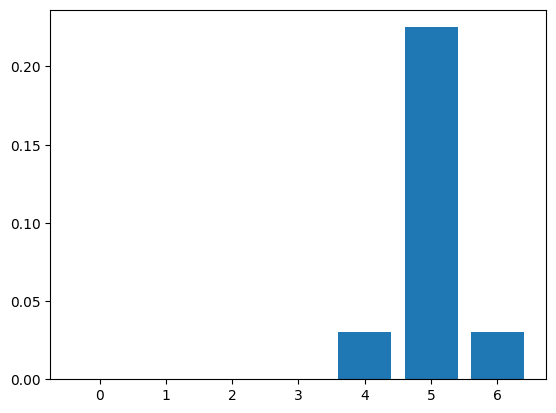

In [156]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(q[0]))], q[0])

In [157]:
q[0] = q[0] / sum(q[0])

In [158]:
q[1] = q[1] / sum(q[1])

In [159]:
print(sum(q[0]))

tensor(1.)


<BarContainer object of 7 artists>

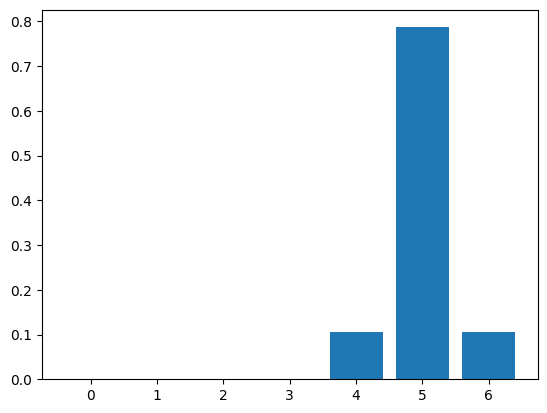

In [160]:
import matplotlib.pyplot as plt
plt.bar([i for i in range(len(q[0]))], q[0])

In [161]:
q[0]

tensor([1.5175e-22, 9.9639e-15, 1.1983e-08, 2.6393e-04, 1.0648e-01, 7.8678e-01,
        1.0648e-01])

In [162]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
  (commit or discard the untracked or modified content in submodules)
	modified:   ../05.Tasks/ObjectDetection/00.Benchmark/faster_rcnn_pytorch (modified content, untracked content)
	modified:   ../06.Gits/01.SAMRS_MTP/MTP (modified content, untracked content)
	modified:   ../06.Gits/02.DDETR/Deformable-DETR (modified content, untracked content)
	modified:   ../06.Gits/03.OWDETR/OW-DETR (modified content, untracked content)
	modified:   ../06.Gits/04.Deform_Conv/pytorch-deform-conv-v2 (modified content, untracked content)
	modified:   ../06.Gits/05.OWOD/01.PROB/PROB (modified content, untracked content)
	modified:   ../06.Gits/06.OOD/deep_Mahalanobis_detector (modified content, untracked content)
	modified:   ../06.Gits/06.OOD/odin/odin (modified content)
	modified:   ../06.Gits/Faster_RCNN_/simple-faster-rc

In [163]:
!git add .

In [164]:
!git commit -m "Label Distribution with KL divergence => hype : variance value"

[master 7772ffa] Label Distribution with KL divergence => hype : variance value
 1 file changed, 310 insertions(+)
 create mode 100644 00.Fundamentals/26.Label_to_Distribution_v3.ipynb


In [165]:
!git push origin

Username for 'https://github.com': ^C
